In [1]:
from scripts.perceptron import PerceptronAlgorithm

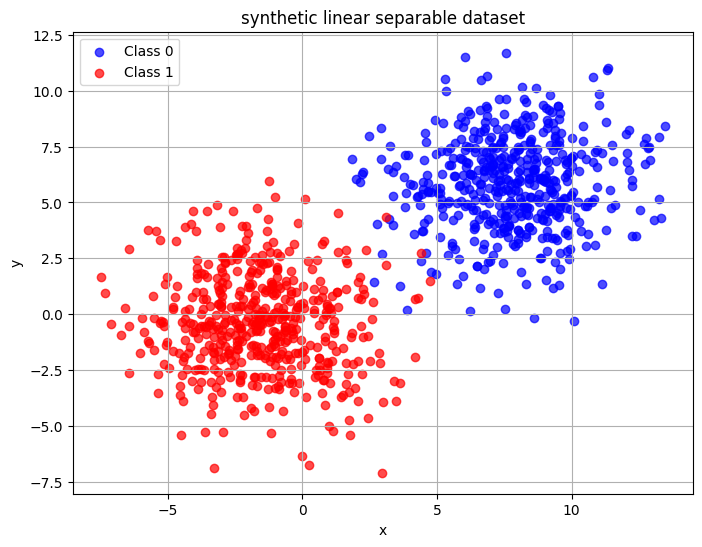

In [2]:
#LIENAR DATASET GENERATION
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dataset_perc = make_blobs(n_samples=1000, centers=2, cluster_std=2.2, random_state=92)
x,y = dataset_perc
plt.figure(figsize=(8, 6))
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='blue', label='Class 0', alpha=0.7)
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='red', label='Class 1', alpha=0.7)
plt.title("synthetic linear separable dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

In [3]:
#PERCEPTRON TEST

# training
model = PerceptronAlgorithm(eta = 0.1, max_epochs = 100, threshold = 1e-3)
model.fit(x, y)

print("Loss = ", model.loss)
print("Cost = ", model.cost_)

# make test
model.test(x, y)
print("Accuracy = ", model.accuracy, "%")

Epoch  1  ===> error =  0.022 ... 

Epoch  2  ===> error =  0.01 ... 

Epoch  3  ===> error =  0.01 ... 

Epoch  4  ===> error =  0.0075 ... 

Epoch  5  ===> error =  0.006 ... 

Epoch  6  ===> error =  0.007 ... 

Epoch  7  ===> error =  0.0075 ... 

Epoch  8  ===> error =  0.0045 ... 

Epoch  9  ===> error =  0.0075 ... 

Epoch  10  ===> error =  0.0055 ... 

Epoch  11  ===> error =  0.008 ... 

Epoch  12  ===> error =  0.006 ... 

Epoch  13  ===> error =  0.0055 ... 

Epoch  14  ===> error =  0.006 ... 

Epoch  15  ===> error =  0.0065 ... 

Epoch  16  ===> error =  0.006 ... 

Epoch  17  ===> error =  0.005 ... 

Epoch  18  ===> error =  0.0075 ... 

Epoch  19  ===> error =  0.0045 ... 

Epoch  20  ===> error =  0.0075 ... 

Epoch  21  ===> error =  0.0055 ... 

Epoch  22  ===> error =  0.005 ... 

Epoch  23  ===> error =  0.0065 ... 

Epoch  24  ===> error =  0.0055 ... 

Epoch  25  ===> error =  0.005 ... 

Epoch  26  ===> error =  0.0065 ... 

Epoch  27  ===> error =  0.006 ... 

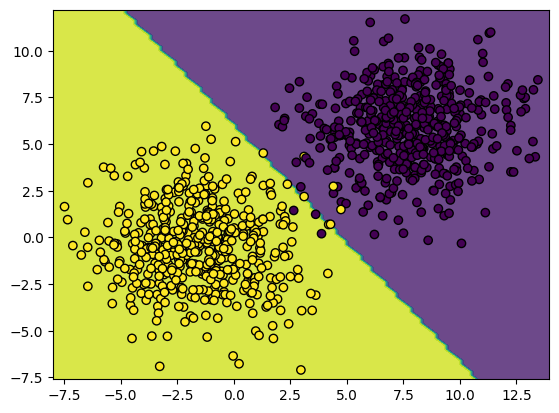

In [4]:
import numpy as np
#PREDICTION PLOT FOR PERCEPTRON
def plot_decision_boundary_perc(model, x, y, resolution=100):
    x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, resolution),
        np.linspace(y_min, y_max, resolution)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    predictions = [model.predict(point) for point in grid]
    zz = np.array(predictions).reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, alpha=0.8, cmap='viridis')
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k', cmap='viridis')
    plt.show()

plot_decision_boundary_perc(model, x, y)

In [5]:
from scripts.evaluator import EvalClassifier

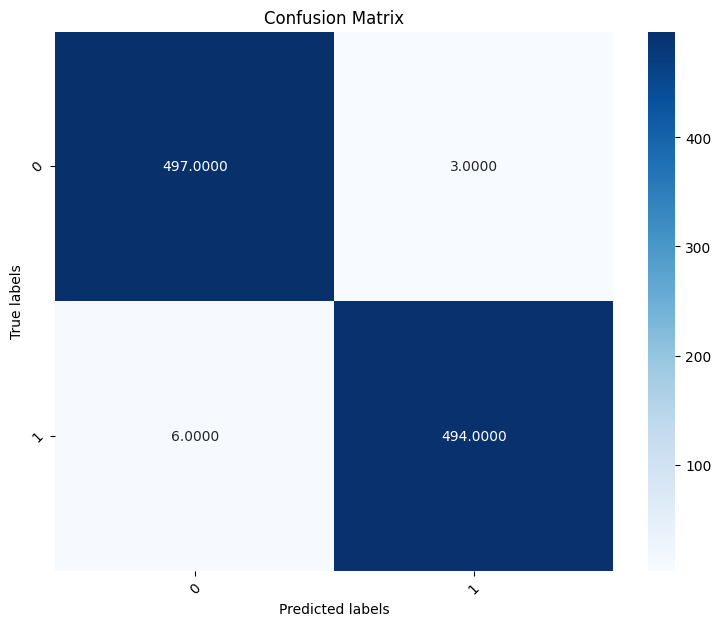

Metrics by class:
    accuracy  precision  recall  specificity  f1-score
0     0.991   0.988072   0.994        0.988  0.991027
1     0.991   0.993964   0.988        0.994  0.990973


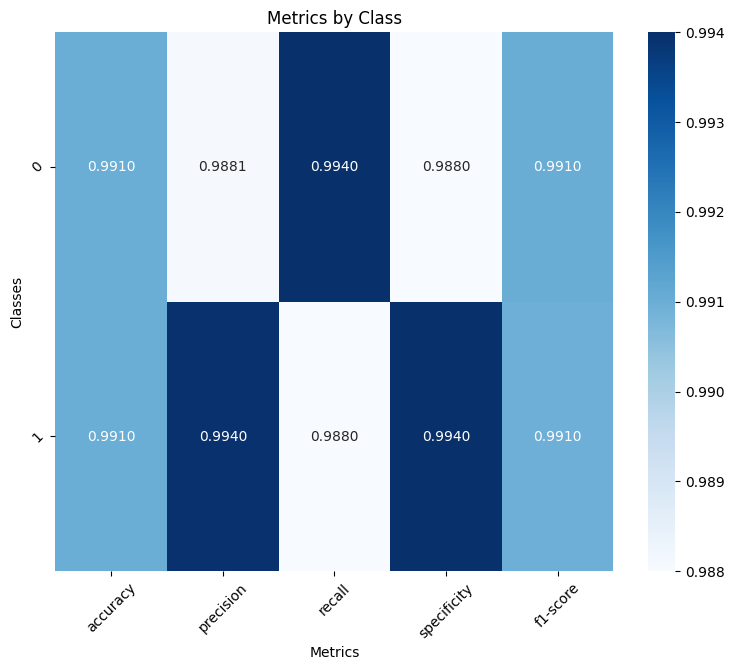

Overall metrics:
               accuracy  precision  recall  specificity  f1-score
Mean-metrics     0.991   0.991018   0.991        0.991     0.991


In [6]:
#METRICS FOR PERCEPTRON
y_pred = model.test(x, y)

evaluator = EvalClassifier(model=model)

classes=[0,1]

conf_matrix = evaluator.get_confusion_matrix(y, y_pred, classes)

evaluator.plot_confusion_matrix(conf_matrix, classes)

metrics_by_class = evaluator.calculate_metrics_by_class(conf_matrix, classes)
print("Metrics by class:\n", metrics_by_class)

evaluator.plot_metrics_by_class(metrics_by_class, title="Metrics by Class")

overall_metrics = evaluator.calculate_metrics_xall(conf_matrix, metrics_by_class)
print("Overall metrics:\n", overall_metrics)

In [7]:
from scripts.mlp import MLPAlgorithm

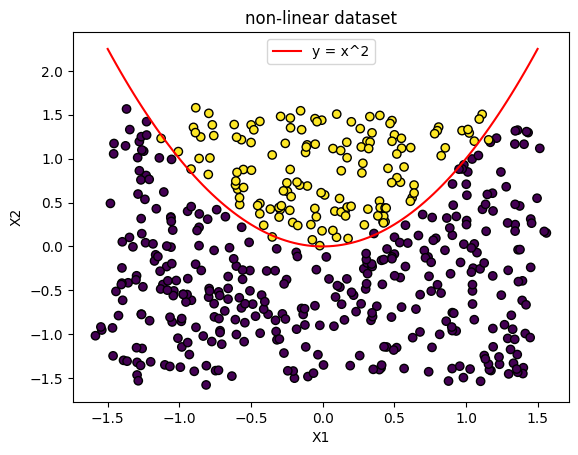

In [8]:
#NON-LIENAR DATASET GENERATION
def generate_parabolic_data(n_samples=500, noise=0.1):
    x = np.random.uniform(-1.5, 1.5, (n_samples, 2))  # Генерация случайных точек в диапазоне [-1.5, 1.5]
    y = (x[:, 1] > x[:, 0]**2).astype(int)  # Класс 1: выше параболы, Класс 0: ниже параболы

    # Добавление шума
    x += np.random.normal(0, noise, x.shape)
    
    return x, y

# Генерация данных
x, y = generate_parabolic_data(n_samples=500, noise=0.05)

# Визуализация данных
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', edgecolor='k')
x_vals = np.linspace(-1.5, 1.5, 100)
plt.plot(x_vals, x_vals**2, color='red', label="y = x^2")
plt.title("non-linear dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

dataset_mlp=x,y

In [9]:
#MLP TEST
# import dataset
x,y=dataset_mlp

# build MLP architecture
model_mlp = MLPAlgorithm(eta = 0.05, threshold = 0.006, max_epochs = 4000)
model_mlp.build_architecture(input_length = 2, hidden_length = 2, output_length = 1)        

# training step
model_mlp.fit(x, y)

# parameters of MLP architecture
print("Weights for hidden layers: ", model_mlp.Wh)
print("Bias for hidden layers: ", model_mlp.bh)
print("Weights for output layers: ", model_mlp.Wo)
print("Bias for output layers: ", model_mlp.bo)
5000
# losses
print("Loss = ", model_mlp.loss_)

# output predictions
print("Output preds = ", model_mlp.fnet_o)

# make pre

# testing
model_mlp.test(x, y)
print("Accuracy = ", model_mlp.accuracy, "%")

Epoch  100 : loss =  0.01098
Epoch  200 : loss =  0.00725
Epoch  300 : loss =  0.00626
Weights for hidden layers:  [[ 6.0749278   4.12473411]
 [ 6.2356599  -4.47457915]]
Bias for hidden layers:  [ 1.44669938 -1.46695265]
Weights for output layers:  [[ 8.94751424 -9.60707066]]
Bias for output layers:  [-3.69081537]
Loss =  0.00599
Output preds =  [0.9946454]
Accuracy =  98.8 %


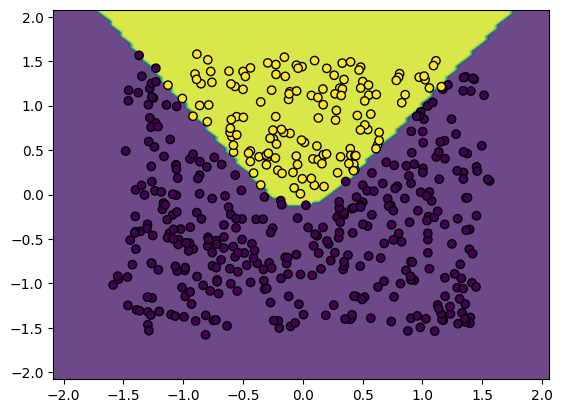

In [10]:
#PREDICTION PLOT FOR MLP
def plot_decision_boundary(model, x, y, resolution=100):

    x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, resolution),
        np.linspace(y_min, y_max, resolution)
    )
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    logits, predictions = zip(*[model.predict(point) for point in grid])
    zz = np.array(predictions).reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, alpha=0.8, cmap='viridis')
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k', cmap='viridis')
    plt.show()

# Plot decision boundary for trained model
plot_decision_boundary(model_mlp, x, y)

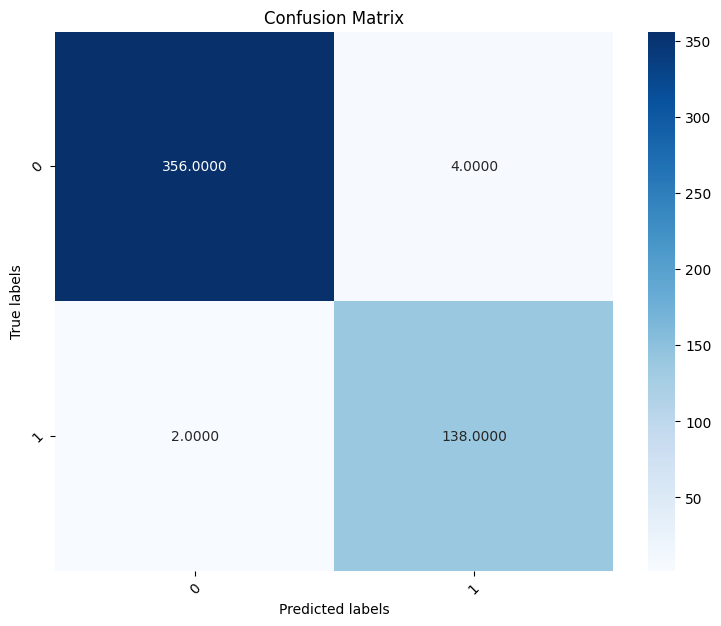

Metrics by class:
    accuracy  precision    recall  specificity  f1-score
0     0.988   0.994413  0.988889     0.985714  0.991643
1     0.988   0.971831  0.985714     0.988889  0.978723


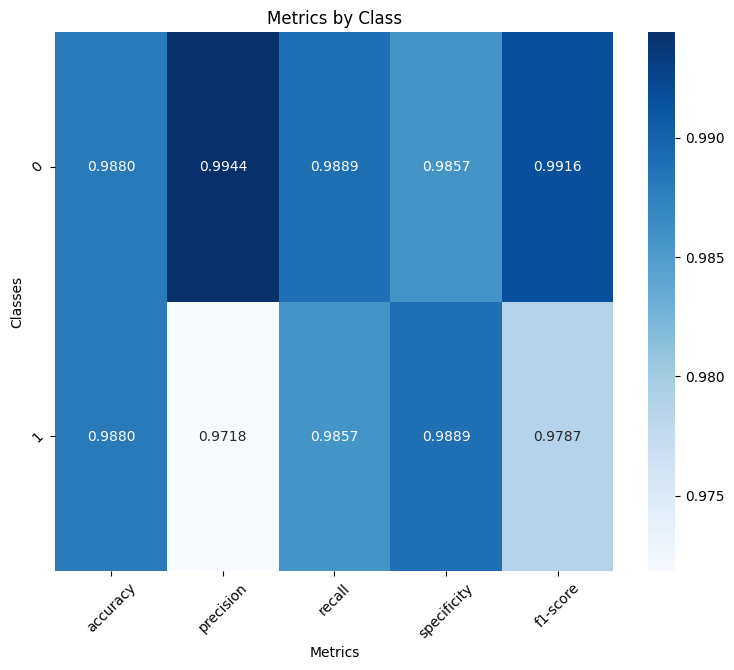

Overall metrics:
               accuracy  precision    recall  specificity  f1-score
Mean-metrics     0.988   0.983122  0.987302     0.987302  0.985183


In [11]:
#METRICS FOR MLP
y_pred = model_mlp.test(x, y)

evaluator = EvalClassifier(model=model_mlp)

conf_matrix = evaluator.get_confusion_matrix(y, y_pred, [0, 1])

evaluator.plot_confusion_matrix(conf_matrix, classes)

metrics_by_class = evaluator.calculate_metrics_by_class(conf_matrix, classes)
print("Metrics by class:\n", metrics_by_class)

evaluator.plot_metrics_by_class(metrics_by_class, title="Metrics by Class")

overall_metrics = evaluator.calculate_metrics_xall(conf_matrix, metrics_by_class)
print("Overall metrics:\n", overall_metrics)